In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#### Replace the directory path here

In [47]:
%cd "C:\Users\TrinaNaskar\Documents\Daimler\New Research\New folder\New Sheets" 

C:\Users\TrinaNaskar\Documents\Daimler\New Research\New folder\New Sheets


In [48]:
series = read_csv('Cobalt_series.csv',parse_dates=[1], index_col= 0).iloc[:,0]
series = pd.DataFrame(series)
series.columns = ['Price']

In [49]:
series.head()

,Price
Date,
1-Jan-11,17.76
1-Feb-11,18.03
1-Mar-11,17.32
1-Apr-11,16.73
1-May-11,17.3


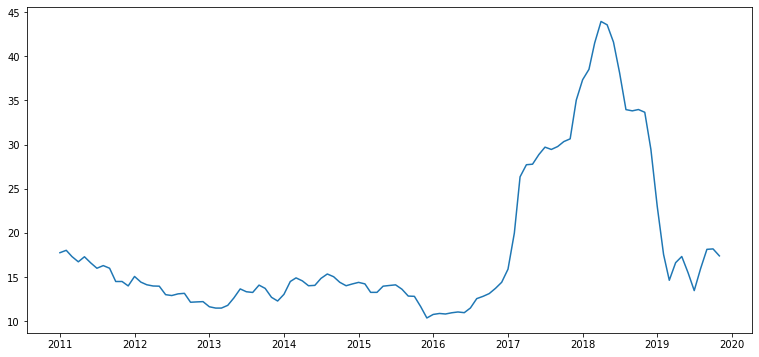

In [50]:
pyplot.figure(figsize = (13,6))

series.index = pd.to_datetime(series.index)
series['Price'] = series['Price'].astype(str).astype(float)
pyplot.plot(series)
pyplot.show()

## Split the data

In [51]:
series_cut = series[:72]
series_repl = series[72:98]

In [52]:
series_repl.head()

,Price
Date,
2017-01-01,15.90
2017-02-01,19.98
2017-03-01,26.35
2017-04-01,27.72
2017-05-01,27.78


### Since Holt Winters gives the best result so far, we are looking to replace the data bump with HW results

### Holt Winter's

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


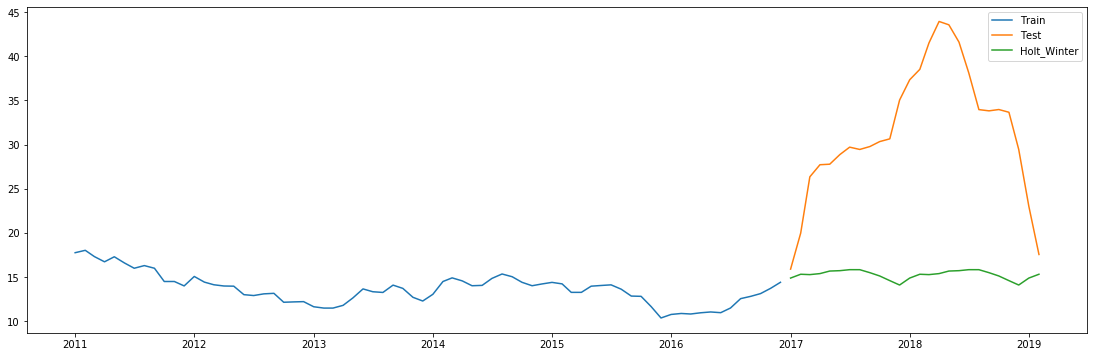

In [53]:
y_hat_avg = series_repl.copy()
fit1 = ExponentialSmoothing(np.asarray(series_cut['Price']) ,seasonal_periods = 12,seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(series_repl))
plt.figure(figsize=(19,6))
plt.plot( series_cut['Price'], label='Train')
plt.plot(series_repl['Price'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [54]:
y_hat_avg['Holt_Winter']

Date
2017-01-01    14.888598
2017-02-01    15.320023
2017-03-01    15.278817
2017-04-01    15.393992
2017-05-01    15.682151
2017-06-01    15.725463
2017-07-01    15.838869
2017-08-01    15.837534
2017-09-01    15.497726
2017-10-01    15.125692
2017-11-01    14.597827
2017-12-01    14.100062
2018-01-01    14.888598
2018-02-01    15.320023
2018-03-01    15.278817
2018-04-01    15.393992
2018-05-01    15.682151
2018-06-01    15.725463
2018-07-01    15.838869
2018-08-01    15.837534
2018-09-01    15.497726
2018-10-01    15.125692
2018-11-01    14.597827
2018-12-01    14.100062
2019-01-01    14.888598
2019-02-01    15.320023
Name: Holt_Winter, dtype: float64

### Replacing the series offline (it's already given with the code)

### Seasonal periods 12 best represents what the prices would have been had the event not affected the price thus taking seasonal periods as 12 to replace the values during this period

## MAPE Calculation

In [31]:
ape =  abs(series_repl['Price'] - y_hat_avg['Holt_Winter'])/series_repl['Price']
mape = sum(ape)/len(ape)
print(mape)

0.0


In [41]:
#series.to_csv('Cobalt_replacement_test.csv')

## Next, we'll use this series for our methods ahead

In [58]:
series = read_csv('Cobalt_replaced_series.csv',parse_dates=[1], index_col= 0)
series = pd.DataFrame(series)
valid_series = read_csv('Valid_temp_file_Cobalt.csv',parse_dates=[1], index_col= 0)

In [59]:
series[72:98]

,Price
Date,
1-Jan-17,14.88859805
1-Feb-17,15.32002326
1-Mar-17,15.27881677
1-Apr-17,15.39399233
1-May-17,15.68215122
1-Jun-17,15.72546262
1-Jul-17,15.83886948
1-Aug-17,15.83753371
1-Sep-17,15.49772648


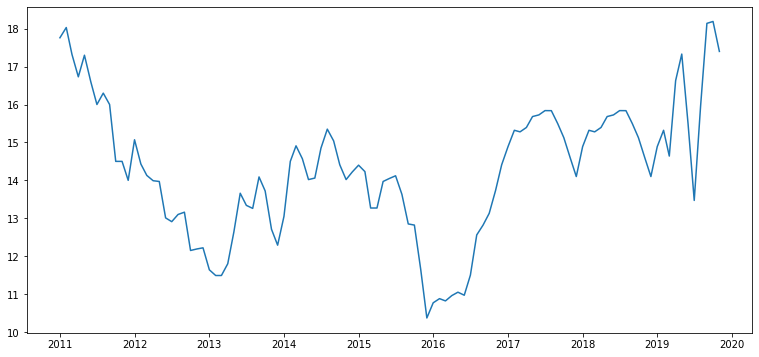

In [60]:
pyplot.figure(figsize = (13,6))

series.index = pd.to_datetime(series.index)
series['Price'] = series['Price'].astype(str).astype(float)
pyplot.plot(series)
pyplot.show()

In [61]:
#divide into train and validation set
train_2003 = series[:107]
valid_2003 = pd.read_csv('Valid_temp_file_Cobalt.csv',parse_dates=[1], index_col= 0)
valid_2003 = valid_2003[107:131]

## Running Holt Winters Again

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


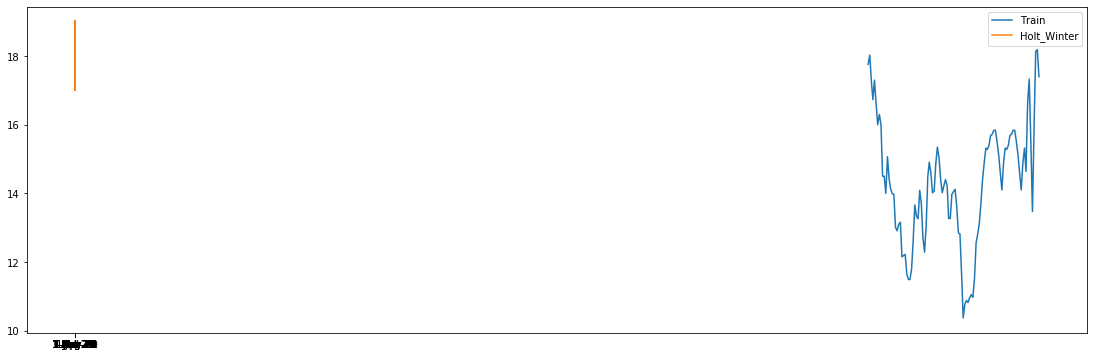

In [62]:
y_hat_avg = valid_2003.copy()
fit1 = ExponentialSmoothing(np.asarray(train_2003['Price']) ,seasonal_periods = 12,seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(steps = 24)
plt.figure(figsize=(19,6))
plt.plot( train_2003['Price'], label='Train')
#plt.plot(valid_2003['Price'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

## MAPE Calculation

In [63]:
ape =  abs(valid_2003['Price'] - y_hat_avg['Holt_Winter'])/valid_2003['Price']
mape = sum(ape)/len(ape)
print(mape)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
y_hat_avg.to_csv('Cobalt_HW_24AheadForecast.csv')